# Datos meteorológicos (AEMET)

Librerias necesarias

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Parámetros de entrada para la API

In [2]:
APIKEY = "Introduce here your API key"
estacion = "1111" # 1109 aeropuerto 1111 Santander ciudad
fecha_inicio = "2022-01-01"
fecha_fin = "2022-06-30"
url = f"https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/{fecha_inicio}T00:00:00UTC/fechafin/{fecha_fin}T23:59:59UTC/estacion/{estacion}/?api_key={APIKEY}"

Extracción de datos

In [4]:
data = requests.get(url)
if data.status_code == 200:
    url_datos = data.json()["datos"]
    data_meteo = requests.get(url_datos)
    if data_meteo.status_code == 200:
        datos_clima = data_meteo.json()
        df_clima = pd.DataFrame(datos_clima)

Extracción de metadatos.

In [5]:
if data.status_code == 200:
    url_metadatos = data.json()["metadatos"]
    metadata_meteo = requests.get(url_metadatos)
    if metadata_meteo.status_code == 200:
        metadatos_clima = metadata_meteo.json()
        df_metadatos_clima = pd.DataFrame(metadatos_clima)

Cambios de formato de string a double, cambio de separador decimal, etc.

In [5]:
df_clima["fecha"] = df_clima["fecha"].apply(pd.to_datetime)
df_clima["prec"] = df_clima["prec"].str.replace(",", ".").str.replace("Ip", "0").astype(float)
df_clima["tmed"] = df_clima["tmed"].str.replace(',', '.').astype(float)
df_clima["velmedia"] = df_clima["velmedia"].str.replace(',', '.').astype(float)
df_clima["hrMedia"] = df_clima["hrMedia"].astype(float)
df_clima.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,sol,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2022-01-01,1111,SANTANDER,CANTABRIA,52,20.8,0.0,"18,4",05:15,"23,3",...,"5,0","1017,0",10,"1014,7",18,37.0,43,Varias,28,21:00
1,2022-01-02,1111,SANTANDER,CANTABRIA,52,17.4,0.0,"13,3",23:50,"21,6",...,"4,4","1021,2",19,"1014,7",Varias,74.0,87,17:00,30,00:00
2,2022-01-03,1111,SANTANDER,CANTABRIA,52,15.8,0.0,"11,0",06:30,"20,7",...,"5,5","1020,0",00,"1004,2",24,55.0,84,04:00,44,Varias
3,2022-01-04,1111,SANTANDER,CANTABRIA,52,13.2,22.7,"8,5",18:30,"17,8",...,"0,0","1011,8",24,"1000,1",06,90.0,95,Varias,46,05:00
4,2022-01-05,1111,SANTANDER,CANTABRIA,52,8.4,1.4,"6,2",23:59,"10,7",...,"0,1","1015,3",24,"1011,4",Varias,71.0,91,Varias,59,01:00


In [6]:
metadatos_clima

{'unidad_generadora': 'Servicio del Banco Nacional de Datos Climatológicos',
 'periodicidad': '1 vez al día, con un retardo de 4 días',
 'descripcion': 'Climatologías diarias',
 'formato': 'application/json',
 'copyright': '© AEMET. Autorizado el uso de la información y su reproducción citando a AEMET como autora de la misma.',
 'notaLegal': 'https://www.aemet.es/es/nota_legal',
 'campos': [{'id': 'fecha',
   'descripcion': 'fecha del dia (AAAA-MM-DD)',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'indicativo',
   'descripcion': 'indicativo climatológico',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'nombre',
   'descripcion': 'nombre (ubicación) de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'provincia',
   'descripcion': 'provincia de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'altitud',
   'descripcion': 'altitud de la estación en m sobre el nivel del mar',
   'tipo_datos': 'float',
   'unidad': 

Plot de varios parámetros meteorológicos

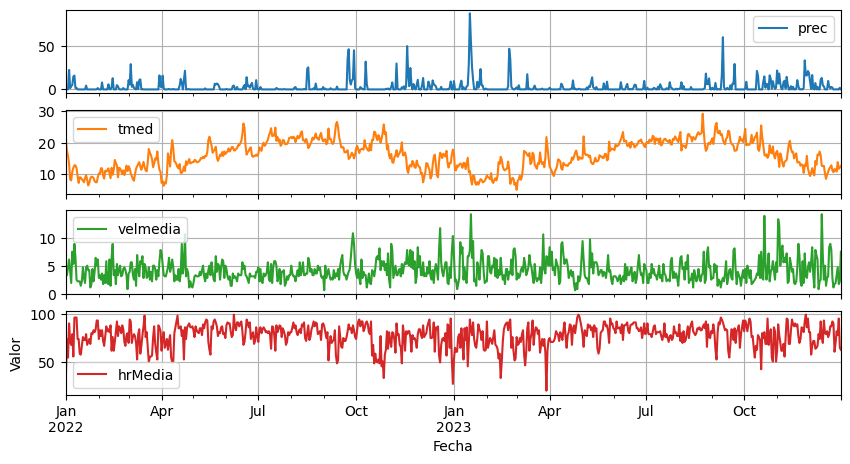

In [7]:
df_clima.plot(x = "fecha", y = ["prec", "tmed", "velmedia", "hrMedia"], figsize = (10, 5), grid = True, 
              subplots = True)
plt.xlabel("Fecha")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()

Quitar datos de fechas de cuando no existen datos de tráfico.

In [8]:
# Quitamos las fechas de las que no tenemos datos en trafico
df = df_clima[~((df_clima.fecha <= "2022-09-17") & (df_clima.fecha >= "2022-09-01"))]

Selección de parámetros interesantes.

In [9]:
# Seleccionamos solo los predictores que nos interesan
df = df.loc[:, ["prec", "tmed", "velmedia", "hrMedia"]]

Exportar a csv los datos

In [12]:
# Exportamos
df.to_csv("Predictores_meteo.csv")